In [13]:
import scipy.io as sio
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import iisignature
import matplotlib as mpl 
import matplotlib.pyplot as plt


In [14]:
mpl.rc('axes.spines', top=True, bottom=True, left=True, right=True)
#mpl.rc('axes', facecolor='white')
mpl.rc("xtick", bottom=True, labelbottom=True)
mpl.rc("ytick", left=True, labelleft=True)
mpl.style.use('ggplot')

# center images
from IPython.core.display import HTML
HTML("""
<style>
.jp-RenderedImage, .output_png{
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
df = pd.DataFrame([])
data_path = './signatures_data/DB3/S1_E1_A1.mat'

mat = sio.loadmat(data_path) 

In [5]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'emg', 'acc', 'stimulus', 'glove', 'inclin', 'subject', 'exercise', 'repetition', 'restimulus', 'rerepetition'])

In [8]:
df = pd.DataFrame(mat['emg'])
df['stimulus'] = mat['restimulus']
df['repetition'] = mat['repetition']


In [9]:
np.unique(df['stimulus']), np.unique(df['repetition'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17], dtype=int8),
 array([0, 1, 2, 3, 4, 5, 6], dtype=int8))

<AxesSubplot: title={'center': 'sEMG Electrode Signals'}>

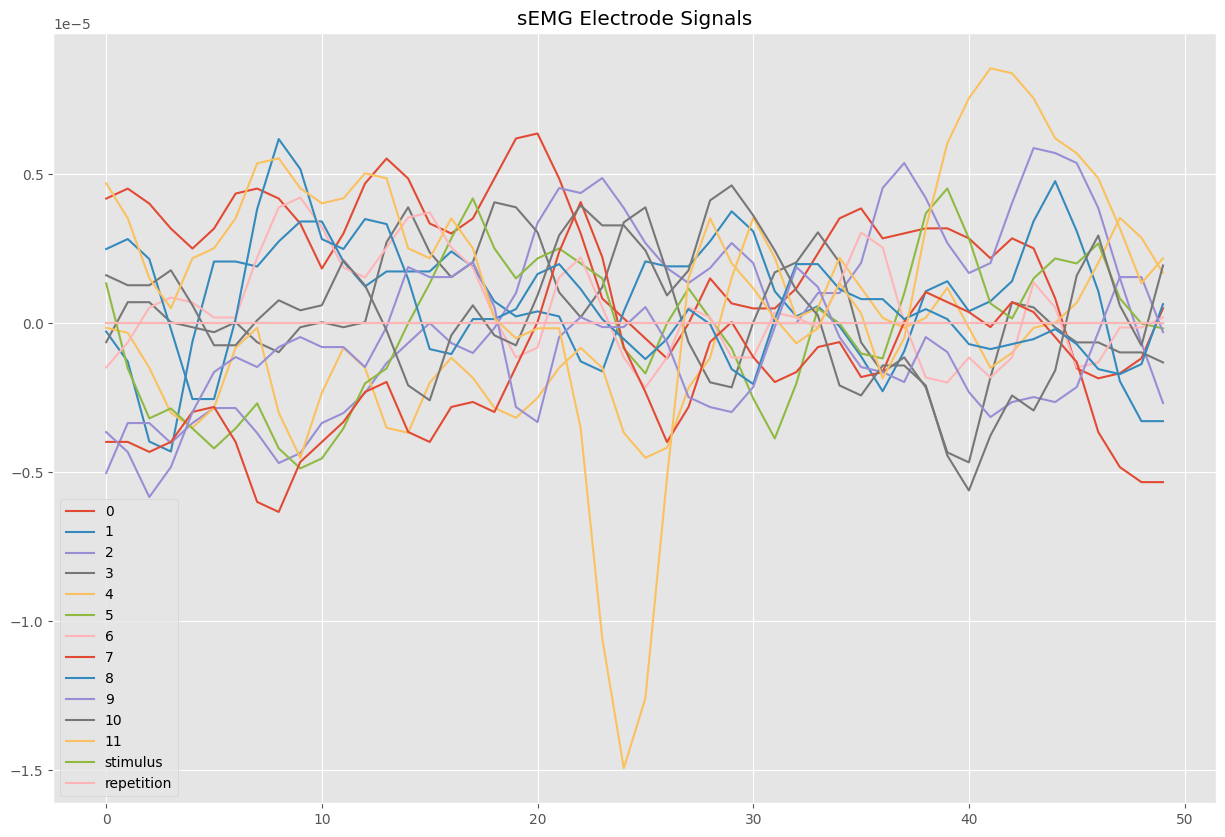

In [15]:
df[:50].plot(figsize=(15,10), title="sEMG Electrode Signals")

In [19]:
df.keys()

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'stimulus', 'repetition'], dtype='object')

In [22]:
s = iisignature.sig(mat['emg'], 2)

In [23]:
s.shape

(156,)

In [24]:
test_data_path = './signatures_data/DB1/s1/S1_E1_A1.mat'

mat = sio.loadmat(test_data_path)

data_emg = pd.DataFrame(mat['emg'])
data_emg['stimulus'] = mat['restimulus']
data_emg['repetition'] = mat['repetition']

In [32]:
s_intact = iisignature.sig(mat['emg'][0], 2)

RuntimeError: data must be 2d

In [28]:
s_intact.shape

(272,)

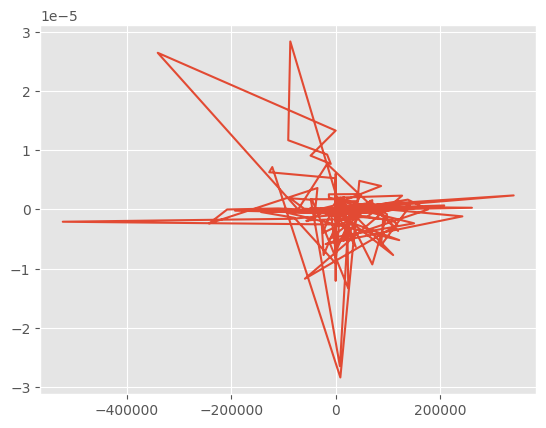

In [31]:
plt.plot( s_intact[:156], s)